In [ ]:
import pandas as pd
from numpy import array
import nltk
nltk.download('punkt')

!pip install -U gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
import random

data = pd.read_csv('Stages_re.csv', error_bad_lines=False)
# print(data.head(10))

In [ ]:
data['tokens'] = data.apply(lambda row: nltk.word_tokenize(str(row['text_lemma'])), axis=1)
dictionary = gensim.corpora.Dictionary(data['tokens'])
print(dictionary)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    # if count > 10:
    #     break
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in data['tokens']]
# print(bow_corpus)
# import csv

# dict = {'Python' : '.py', 'C++' : '.cpp', 'Java' : '.java'}
# w = csv.writer(open("output.csv", "w"))
# for key, val in dictionary.items():
#     w.writerow([key, val])
# f = open("dict.txt","w")
# f.write( str(dictionary) )
# f.close()

Dictionary(764 unique tokens: ['yeah', 'name', 'yes', 'yep', 'wow']...)
0 yeah
1 name
2 yes
3 yep
4 wow
5 anything
6 cool
7 thats
8 darkness
9 total
10 work
11 no
12 see
13 understood
14 thanks
15 good
16 happy
17 right
18 lasagna
19 etc
20 bye
21 course
22 sound
23 ok
24 dont
25 know
26 really
27 sure
28 case
29 unpleasant
30 half
31 maybe
32 send
33 back
34 nice
35 sorry
36 welcome
37 youre
38 damn
39 ahhhhh
40 laugh
41 loud
42 care
43 confuse
44 hesitation
45 kid
46 absolutely
47 thank
48 miss
49 still
50 busy
51 hello
52 well
53 easy
54 pick
55 ready
56 amaze
57 night
58 later
59 talk
60 text
61 mistake
62 accept
63 hi
64 sherry
65 funny
66 certainly
67 usualy
68 awesome
69 god
70 oh
71 alot
72 watch
73 close
74 stop
75 whatever
76 computeraided
77 manufacturing
78 web
79 wide
80 world
81 kidding
82 say
83 shes
84 hell
85 fool
86 mind
87 never
88 hehe
89 rach
90 kind
91 u
92 whats
93 give
94 minute
95 iam
96 shy
97 tell
98 tight
99 want
100 ever
101 respect
102 start
103 paint
104 

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
# from pprint import pprint
# print([[(dictionary[id], freq) for id, freq in cp] for cp in corpus_tfidf[:2819]])
# for doc in corpus_tfidf:
#     pprint(doc)
#     break
# print(len(dictionary))
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=12, id2word=dictionary, passes=2, workers=2)
# for idx, topic in lda_model.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.164*"loud" + 0.159*"laugh" + 0.089*"cool" + 0.053*"know" + 0.015*"happy" + 0.014*"want" + 0.014*"look" + 0.014*"thats" + 0.014*"talk" + 0.013*"go"
Topic: 1 
Words: 0.071*"dont" + 0.049*"no" + 0.037*"know" + 0.030*"would" + 0.026*"like" + 0.025*"let" + 0.025*"yes" + 0.022*"kid" + 0.021*"ask" + 0.021*"baby"
Topic: 2 
Words: 0.165*"see" + 0.060*"call" + 0.051*"half" + 0.032*"want" + 0.027*"like" + 0.023*"man" + 0.022*"understood" + 0.021*"ok" + 0.021*"thats" + 0.018*"whatever"
Topic: 3 
Words: 0.120*"ok" + 0.084*"want" + 0.053*"sure" + 0.035*"make" + 0.031*"come" + 0.026*"loud" + 0.026*"honey" + 0.022*"laugh" + 0.021*"cool" + 0.018*"wish"
Topic: 4 
Words: 0.149*"get" + 0.072*"good" + 0.028*"take" + 0.028*"go" + 0.027*"color" + 0.026*"cant" + 0.026*"loud" + 0.023*"laugh" + 0.021*"right" + 0.020*"finger"
Topic: 5 
Words: 0.075*"hello" + 0.044*"go" + 0.031*"tell" + 0.030*"find" + 0.029*"sound" + 0.027*"confuse" + 0.026*"wow" + 0.026*"whatever" + 0.022*"dont" + 0.020*"want"

In [ ]:
# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     """
#     Compute c_v coherence for various number of topics
#     Parameters:
#     ----------
#     dictionary : Gensim dictionary
#     corpus : Gensim corpus
#     texts : List of input texts
#     limit : Max num of topics
#     Returns:
#     -------
#     model_list : List of LDA topic models
#     coherence_values : Coherence values corresponding to the LDA model with respective number of topics
#     """
#     coherence_values = []
#     random.seed(1)
#     model_list = []
#     for num_topics in range(start, limit, step):
#         model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=10, workers=4)
#         # model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())

#     return model_list, coherence_values

# model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=data['tokens'], start=2, limit=40, step=2)



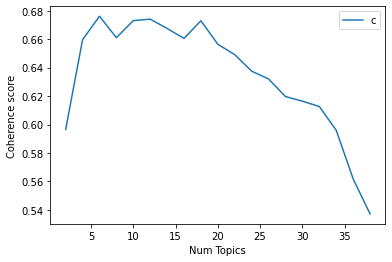

In [ ]:
# Show graph
# limit=40
# start=2
# step=2
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()

In [ ]:
# Print the coherence scores
# for m, cv in zip(x, coherence_values):
#     print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5918
Num Topics = 4  has Coherence Value of 0.6451
Num Topics = 6  has Coherence Value of 0.6818
Num Topics = 8  has Coherence Value of 0.6814
Num Topics = 10  has Coherence Value of 0.6923
Num Topics = 12  has Coherence Value of 0.6622
Num Topics = 14  has Coherence Value of 0.6806
Num Topics = 16  has Coherence Value of 0.6725
Num Topics = 18  has Coherence Value of 0.6641
Num Topics = 20  has Coherence Value of 0.6557
Num Topics = 22  has Coherence Value of 0.6447
Num Topics = 24  has Coherence Value of 0.6517
Num Topics = 26  has Coherence Value of 0.6339
Num Topics = 28  has Coherence Value of 0.6372
Num Topics = 30  has Coherence Value of 0.6191
Num Topics = 32  has Coherence Value of 0.6008
Num Topics = 34  has Coherence Value of 0.5936
Num Topics = 36  has Coherence Value of 0.5695
Num Topics = 38  has Coherence Value of 0.5627


In [ ]:
# lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=6, id2word=dictionary, passes=10, workers=4)
# for idx, topic in lda_model_tfidf.print_topics(-1):
#     print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.934*"hello" + 0.008*"offence" + 0.008*"cool" + 0.007*"loud" + 0.007*"laugh" + 0.007*"yes" + 0.007*"ok" + 0.007*"see" + 0.007*"half" + 0.007*"yeah"
Topic: 1 Word: 0.930*"see" + 0.009*"yes" + 0.008*"half" + 0.008*"cool" + 0.008*"offence" + 0.007*"ok" + 0.007*"hello" + 0.007*"loud" + 0.007*"yeah" + 0.007*"laugh"
Topic: 2 Word: 0.340*"laugh" + 0.328*"loud" + 0.311*"half" + 0.004*"ok" + 0.003*"cool" + 0.003*"yes" + 0.003*"yeah" + 0.003*"see" + 0.003*"hello" + 0.003*"offence"
Topic: 3 Word: 0.971*"yes" + 0.004*"half" + 0.004*"yeah" + 0.003*"ok" + 0.003*"loud" + 0.003*"laugh" + 0.003*"hello" + 0.003*"see" + 0.003*"cool" + 0.003*"offence"
Topic: 4 Word: 0.952*"ok" + 0.006*"cool" + 0.005*"see" + 0.005*"laugh" + 0.005*"loud" + 0.005*"yes" + 0.005*"half" + 0.005*"hello" + 0.005*"yeah" + 0.005*"offence"
Topic: 5 Word: 0.482*"cool" + 0.253*"offence" + 0.245*"yeah" + 0.003*"yes" + 0.003*"half" + 0.003*"ok" + 0.003*"hello" + 0.003*"see" + 0.003*"loud" + 0.003*"laugh"


In [ ]:
# for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 8)))


Score: 0.5416650176048279	 
Topic: 0.218*"yes" + 0.057*"yeah" + 0.037*"say" + 0.028*"would" + 0.025*"ok" + 0.024*"nice" + 0.022*"day" + 0.021*"really"

Score: 0.04166707023978233	 
Topic: 0.053*"back" + 0.041*"would" + 0.035*"excite" + 0.026*"give" + 0.025*"talk" + 0.024*"mom" + 0.024*"get" + 0.022*"need"

Score: 0.041666820645332336	 
Topic: 0.165*"see" + 0.060*"call" + 0.051*"half" + 0.032*"want" + 0.027*"like" + 0.023*"man" + 0.022*"understood" + 0.021*"ok"

Score: 0.04166681319475174	 
Topic: 0.048*"get" + 0.046*"hard" + 0.040*"look" + 0.039*"im" + 0.037*"maybe" + 0.025*"dad" + 0.023*"bye" + 0.022*"try"

Score: 0.04166680946946144	 
Topic: 0.164*"loud" + 0.159*"laugh" + 0.089*"cool" + 0.053*"know" + 0.015*"happy" + 0.014*"want" + 0.014*"look" + 0.014*"thats"

Score: 0.041666798293590546	 
Topic: 0.084*"like" + 0.050*"girl" + 0.045*"love" + 0.036*"good" + 0.031*"nice" + 0.031*"would" + 0.028*"guy" + 0.026*"wear"

Score: 0.041666775941848755	 
Topic: 0.071*"dont" + 0.049*"no" + 0.03

In [ ]:

# coherence_model_lda = CoherenceModel(model=lda_model, texts=data['tokens'],dictionary=dictionary, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6075352446025564


In [ ]:
# vis = pyLDAvis.gensim.prepare(lda_model, corpus_tfidf, dictionary)
# # vis
# pyLDAvis.save_html(vis, 'LDA_Visualization12.html')

In [ ]:
docs=[]

c=0
for c in range(0,len(bow_corpus)):
    counter=0
    vector=[]
    for index, score in lda_model[bow_corpus[c]]:
        # print("\nScore: {}\t \nTopic: {}".format(score, index))
        while index!=counter:
            vector.append(0.0)
            counter+=1
        vector.append(score)
        counter+=1
    #number of topics is 8

        
      
    # while(len(vector)!=8):
    #     vector.append(0)
    while counter!=12:
        vector.append(0.0)
        counter+=1   
    c=c+1
    docs.append(vector)
# print(len(bow_corpus)-1)
# print(len(data['question']))
data['msgtopics']=docs
# print(data['msgtopics'])
# print(data.keys())



0       [0.04166681, 0.041666776, 0.04166682, 0.041666...
1       [0.5416546, 0.04166757, 0.04166757, 0.0416678,...
2       [0.041666694, 0.04166705, 0.04166672, 0.041666...
3       [0.083333336, 0.083333336, 0.083333336, 0.0833...
4       [0.041667156, 0.041666914, 0.04166758, 0.04166...
                              ...                        
1174    [0.5416603, 0.04166712, 0.04166712, 0.04166712...
1175    [0.020833893, 0.020834297, 0.02083359, 0.02083...
1176    [0.027778171, 0.027779514, 0.027778111, 0.0277...
1177    [0.36825806, 0.027778843, 0.027778266, 0.02777...
1178    [0.04166726, 0.04166789, 0.04166834, 0.0416672...
Name: msgtopics, Length: 1179, dtype: object
Index(['Column1', 'Unnamed: 0', '0', '1', 'Chat', 'Stage', 'text_lower',
       'text_punct', 'text_stop', 'text_lemma', 'text_token', 'tokens',
       'msgtopics'],
      dtype='object')


In [ ]:
# # docs=[]

# # c=0
# # for c in range(0,len(bow_corpus)):

# vector0=[]
# vector1=[]
# vector2=[]
# vector3=[]

# # data['tokens'] = data.apply(lambda row: nltk.word_tokenize(str(row['text_lemma'])), axis=1)
# # stage0_string="think bull run hello hi beth make favorite pasta"
# stage0=data['text_lemma'][:316].tolist()
# stage1=data['text_lemma'][317:610].tolist()
# stage2=data['text_lemma'][611:951].tolist()
# stage3=data['text_lemma'][952:1180].tolist()
# # print(stage0)

# text0=" "
# text1=" "
# text2=" "
# text3=" "

# text0=text0.join(stage0)
# text1=text1.join(stage1)
# text2=text2.join(stage2)
# text3=text3.join(stage3)
# # print(text)
# tokens_stage0=nltk.word_tokenize(text0)
# tokens_stage1=nltk.word_tokenize(text1)
# tokens_stage2=nltk.word_tokenize(text2)
# tokens_stage3=nltk.word_tokenize(text3)

# # print(tokens_stage)

# stage0_string=dictionary.doc2bow(tokens_stage0)
# stage1_string=dictionary.doc2bow(tokens_stage1)
# stage2_string=dictionary.doc2bow(tokens_stage2)
# stage3_string=dictionary.doc2bow(tokens_stage3)
# # print(stage_string)
# # bow_corpus = dictionary.doc2bow(doc) for doc in data['tokens']
# counter=0
# for index, score in lda_model[stage0_string]:
#     print("\nScore: {}\t \nTopic: {}".format(score, index))
#     while index!=counter:
#         vector0.append(0.0)
#         counter+=1
#     vector0.append(score)
#     counter+=1
#     #number of topics is 10
# while counter!=12:
#     vector0.append(0.0)
#     counter+=1   

# print(vector0)

# counter=0
# for index, score in lda_model[stage1_string]:
#     print("\nScore: {}\t \nTopic: {}".format(score, index))
#     while index!=counter:
#         vector1.append(0.0)
#         counter+=1
#     vector1.append(score)
#     counter+=1
#     #number of topics is 10
# while counter!=12:
#     vector1.append(0.0)
#     counter+=1   

# print(vector1)

# counter=0
# for index, score in lda_model[stage2_string]:
#     print("\nScore: {}\t \nTopic: {}".format(score, index))
#     while index!=counter:
#         vector2.append(0.0)
#         counter+=1
#     vector2.append(score)
#     counter+=1
#     #number of topics is 10
# while counter!=12:
#     vector2.append(0.0)
#     counter+=1   

# print(vector2)


# counter=0
# for index, score in lda_model[stage3_string]:
#     print("\nScore: {}\t \nTopic: {}".format(score, index))
#     while index!=counter:
#         vector3.append(0.0)
#         counter+=1
#     vector3.append(score)
#     counter+=1
#     #number of topics is 10
# while counter!=12:
#     vector3.append(0.0)
#     counter+=1   

# print(vector3)



Score: 0.30958086252212524	 
Topic: 0

Score: 0.03097713366150856	 
Topic: 1

Score: 0.10208510607481003	 
Topic: 2

Score: 0.0906410664319992	 
Topic: 3

Score: 0.12597079575061798	 
Topic: 5

Score: 0.014919486828148365	 
Topic: 6

Score: 0.01904255338013172	 
Topic: 7

Score: 0.20725588500499725	 
Topic: 9

Score: 0.01691790297627449	 
Topic: 10

Score: 0.07638991624116898	 
Topic: 11
[0.30958086, 0.030977134, 0.102085106, 0.09064107, 0.0, 0.1259708, 0.014919487, 0.019042553, 0.0, 0.20725589, 0.016917903, 0.076389916]

Score: 0.19596464931964874	 
Topic: 0

Score: 0.11618643999099731	 
Topic: 1

Score: 0.03161865845322609	 
Topic: 2

Score: 0.07503663748502731	 
Topic: 3

Score: 0.0778905376791954	 
Topic: 4

Score: 0.08223467320203781	 
Topic: 5

Score: 0.04867629334330559	 
Topic: 6

Score: 0.022814089432358742	 
Topic: 7

Score: 0.05695538595318794	 
Topic: 8

Score: 0.060928914695978165	 
Topic: 9

Score: 0.17870905995368958	 
Topic: 10

Score: 0.05298459529876709	 
Topic: 11
[

In [ ]:
def find_topic_vector(stagetest):
    test=[]
    # vector1=[]
    # vector2=[]
    # vector3=[]

    # data['tokens'] = data.apply(lambda row: nltk.word_tokenize(str(row['text_lemma'])), axis=1)
    # stage0_string="think bull run hello hi beth make favorite pasta"
    # stagetest=data['text_lemma'][:4].tolist()#comment this
 

    # test_text=" "

  
    # test_text=test_text.join(stagetest)
    
    tokens_stage_test=nltk.word_tokenize(stagetest)
    # tokens_stage1=nltk.word_tokenize(text1)
    # tokens_stage2=nltk.word_tokenize(text2)
    # tokens_stage3=nltk.word_tokenize(text3)

    # print(tokens_stage_test)

    stagetest_string=dictionary.doc2bow(tokens_stage_test)
    # stage1_string=dictionary.doc2bow(tokens_stage1)
    # stage2_string=dictionary.doc2bow(tokens_stage2)
    # stage3_string=dictionary.doc2bow(tokens_stage3)
    # print(stagetest_string)
    # bow_corpus = dictionary.doc2bow(doc) for doc in data['tokens']
    counter=0
    for index, score in lda_model[stagetest_string]:
        # print("\nScore: {}\t \nTopic: {}".format(score, index))
        while index!=counter:
            test.append(0.0)
            counter+=1
        test.append(score)
        counter+=1
        #number of topics is 10
    while counter!=12:
        test.append(0.0)
        counter+=1   

    return test

In [ ]:
#Preprocessing test data
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
import csv

!pip install emot
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


#Importing stopwords from nltk library

nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} # Pos tag, used Noun, Verb, Adjective and Adverb


#function to transform abbreviations from slang_dict
def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "slang_dict_edited_more.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="`")
            # Removing Special Characters.
           # _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    return (' '.join(user_string))

def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])


#Creating function for tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

def text_clean(message):
  message=translator(message)  #abbreviations replaced 
  message= convert_emoticons(message)
  message= convert_emojis(message)
  #lowercasing
  message=message.lower() 
  message = message.replace('[^\w\s]','')  
  message=stopwords(message) 
  message= TextBlob(message)
  message=lemmatize_words(message)
  # message=tokenization(message)
  return message



# chat="I like your hair very much lol"
# cleaned_text= text_clean(chat)
# print(cleaned_text)


<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence \W
<input>:71: DeprecationWarning: invalid escape sequence 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calc_cosine(a,b):
  # print(a)
  # print(b)
  dot = np.dot(a, b)
  norma = np.linalg.norm(a)
  normb = np.linalg.norm(b)
  cos = dot / (norma * normb)
  return(cos)

def find_label(msg):
    
    msg=text_clean(msg)
    test=find_topic_vector(msg)
    # print(test)
    #pass a text through preprocessing module before testing it
    knn_test=[]
    for index, row in data.iterrows():
        knn_test.append(calc_cosine(data['msgtopics'][index],test ))
    
    

    max3_ind=find_max(knn_test)
    max3_lab=[]
    for j in max3_ind:
        max3_lab.append(data.iloc[j]['Stage'])
    
    # print(max3_lab)

    counter = 0
    num = max3_lab[0] 
      
    for i in max3_lab: 
        curr_frequency = max3_lab.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    # print(num)
    
    #print( sorted( [(x,i) for (i,x) in enumerate(knn_test)], reverse=True )[:3] )
    # print(knn_test)
    max_cos= max(calc_cosine(vector0,test),calc_cosine(vector1,test),calc_cosine(vector2,test),calc_cosine(vector3,test))

    if (max_cos== calc_cosine(vector2,test)):
      label=2
    elif (max_cos== calc_cosine(vector1,test)):
      label=1
    elif (max_cos== calc_cosine(vector3,test)):
      label=3
    else:
      label=0
    return num

In [ ]:
def find_max(list1):
  final_list = [] 
  
  for i in range(0, 3):  
      max1 = 0
      max=0
      for j in range(len(list1)):      
          if list1[j] > max:
              max= list1[j]; 
              max1 = j; 
                
      list1.remove(max); 
      final_list.append(max1) 
        
  return (final_list) 

In [ ]:
# data['training_label']=0
# for index, row in data.iterrows():
#     # print(row['c1'], row['c2'])
#     data['training_label'][index]=find_label(row["text_lemma"])
# print(data['training_label'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:

# weight1=0.224
# weight2=0.274
# weight3= 0.5

# score=0
# def calc_Score(text):
#   global score
#   label= find_label(text)
#   if label==1:
#     score+= weight1*1
#   elif label==2:
#     score+=weight2*2
#   elif label==3:
#     score+= weight3*3
#   return label

In [ ]:
# def test():

#   test_frame = pd.read_csv (r'child3.csv')
#   print(len(test_frame.index))

#   test_frame['training_label']=0
#   score=0
#   counter=0
#   for index, row in test_frame.iterrows():
#     # print(row['c1'], row['c2'])
#     counter+=1
#     label=find_label(str(row["text_lemma"]))
#     test_frame['training_label'][index]=label
#     if label==1:
#       score+= weight1
#     elif label==2:
#       score+=weight2
#     elif label==3:
#       score+= weight3
#   # print(counter)
#   # print(score)
#   # print(score/counter)


test()

127


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


127
26.080000000000023
0.2053543307086616


In [ ]:
# print(188.00999/1897)
# print(counter)

0.09910911439114391
764


In [ ]:
# countfn=0
# countfp=0
# counttn=0
# counttp=0
# for index, row in data.iterrows():
#     # print(row['Stage'], row['training_label'])
    
#     if str(row['Stage'])== '0' and (str(row['training_label'])=='1' or str(row['training_label'])=='2' or str(row['training_label'])=='3'):
#       countfp+=1
#     if str(row['training_label'])== '0' and (str(row['Stage'])=='1' or str(row['Stage'])=='2' or str(row['Stage'])=='3'):
#       countfn+=1
#     if (str(row['training_label'])== '0' and str(row['Stage'])=='0') or ((str(row['training_label'])=='2' or str(row['training_label'])=='3' or str(row['training_label'])=='1') and (str(row['Stage'])=='2' or str(row['Stage'])=='3' or str(row['Stage'])=='1')):
#       counttp+=1
#     else:
#       counttn+=1
    
# # print(countfn)
# # print(countfp)
# # print(counttn)
# # print(counttp)

# accuracy= (counttp+counttn)/(counttp+counttn+countfp+countfn)
# precision= (counttp)/(counttp+countfp)
# recall= (counttp)/(counttp+counttn)
# F1= (2*precision*recall)/(precision+recall)

# print("Accuracy   = " +str(accuracy))
# print("Precision  = "+str(precision))
# print("Recall     = "+str(recall))
# print("f1-score   = "+str(F1))

Accuracy   = 0.7462025316455696
Precision  = 0.9284009546539379
Recall     = 0.6598812553011026
f1-score   = 0.7714427367377293


In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(data['Stage'], data['training_label']))

              precision    recall  f1-score   support

           0       0.47      0.77      0.58       316
           1       0.42      0.42      0.42       294
           2       0.52      0.42      0.47       341
           3       0.59      0.24      0.34       228

    accuracy                           0.48      1179
   macro avg       0.50      0.46      0.45      1179
weighted avg       0.50      0.48      0.46      1179



In [ ]:
# from sklearn.metrics import f1_score
# metrics.f1_score(data['Stage'], data['training_label'], labels=np.unique(data['training_label']))

NameError: ignored

In [ ]:
# x= data.iloc[:, 12].values  
# y= data.iloc[:, 5].values  
# print(x)
# # Splitting the dataset into training and test set.  
# from sklearn.model_selection import train_test_split  
# x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

# from sklearn.neighbors import KNeighborsClassifier  
# classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
# classifier.fit(x_train, y_train)

In [ ]:
# #Creating a pickle file

# # import pandas
# # from sklearn import model_selection
# # from sklearn.linear_model import LogisticRegression
# import pickle

# filename = 'lda_model.sav'
# pickle.dump(lda_model, open(filename, 'wb'))
 
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# # result = loaded_model.score(X_test, Y_test)
# # print(result)

In [ ]:
#Testing a new message
test_msg="how are you"
stage_lab=find_label(test_msg)